In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_loan_data.csv')
df

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,0.400566,3,7.006072,0.000000,44.917987,16.02,0.181526,1.032965,561,1,0,0,0,1,0,0,0,1,0,0
1,0.400547,0,6.315380,0.000000,17.190584,11.14,0.064709,0.867866,504,0,0,0,1,0,1,0,0,0,0,1
2,0.400608,0,6.320717,1.454795,27.670867,12.87,0.175722,1.032965,635,1,0,0,0,0,0,0,1,0,0,0
3,0.400582,2,7.042976,0.000000,44.917987,15.23,0.175722,0.867866,675,1,0,0,0,1,0,0,1,0,0,0
4,0.400596,3,6.975625,0.709998,44.917987,14.27,0.185437,1.147163,586,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.400628,1,6.857405,2.082661,36.095253,15.66,0.153877,1.032965,645,1,1,0,0,1,0,0,1,0,0,0
44996,0.400681,1,6.973782,3.198901,31.560065,14.07,0.098152,1.499655,621,1,0,0,0,1,0,1,0,0,0,0
44997,0.400666,1,6.920954,2.236097,22.949877,10.02,0.043657,1.470473,668,1,1,0,0,1,0,0,0,0,0,0
44998,0.400644,2,6.717148,1.702249,34.047524,13.23,0.163686,1.299172,604,1,1,0,0,1,1,0,0,0,0,0


In [3]:
X = df.drop(columns = {'loan_status'})
y = df['loan_status']

**Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 93)

**Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]] = ss.fit_transform(X_train.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]])
X_test.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]] = ss.transform(X_test.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8]])

**PCA**

In [6]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 0.95)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [7]:
X_train.shape

(36000, 19)

**Hyperparameter Tuning**

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = True)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=True)

In [ ]:
# from sklearn.tree import plot_tree

# plot_tree(model, filled = True, feature_names = X_train.columns.tolist(), class_names = ['0', '1'])
# plt.show()

In [9]:
model.get_depth()

32

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state = True)
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(1, 33))}

gs = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'accuracy')
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'gini', 'max_depth': 10}

**Modelling + Evaluation**

In [11]:
#Modelling
model = gs.best_estimator_
model

DecisionTreeClassifier(max_depth=10, random_state=True)

**Identifying Important Columns**

In [13]:
f = pd.DataFrame(model.feature_importances_, columns = ['Feature Importance'], index = X_train.columns.tolist())
f

,Feature Importance
person_age,0.001664
person_education,0.001039
person_income,0.100444
person_emp_exp,0.002098
loan_amnt,0.005947
loan_int_rate,0.178656
loan_percent_income,0.185949
cb_person_cred_hist_length,0.001285
credit_score,0.018211
person_gender_male,0.000000


In [15]:
imp = f[f['Feature Importance'] > 0].index.tolist()
imp

['person_age',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'previous_loan_defaults_on_file_Yes']

In [17]:
X_train = X_train.loc[:, imp]
X_test = X_test.loc[:, imp]

# **Final Model**

In [19]:
#Modelling
model = gs.best_estimator_
model.fit(X_train, y_train)

#Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, ypred_train)
accuracy_test = accuracy_score(y_test, ypred_test)

from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

print('Accuracy(train): ', accuracy_train)
print('Cv-Score: ', cv)
print('Accuracy(test): ', accuracy_test)

if (abs(accuracy_train - cv) <= 0.05) and (abs(accuracy_train - accuracy_test) <= 0.05):
  print('Good Model')
else:
  print('Bad Model')

Accuracy(train):  0.9323611111111111
Cv-Score:  0.9189444444444446
Accuracy(test):  0.9227777777777778
Good Model


In [20]:
%%timeit
model.fit(X_train, y_train)

110 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Confusion Matrix**

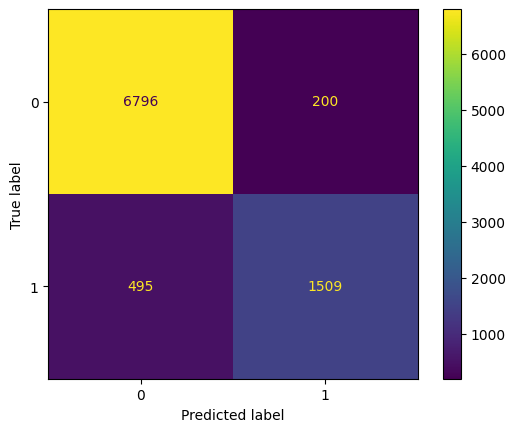

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, ypred_test)
ConfusionMatrixDisplay(cm).plot()

**ROC**

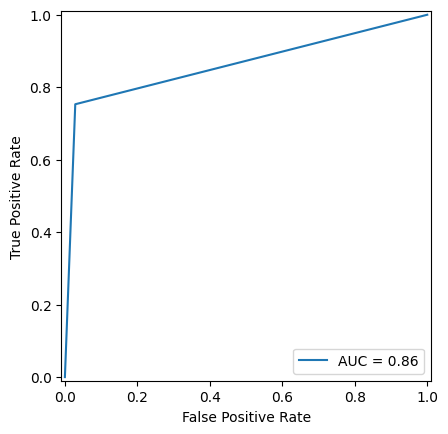

In [22]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, ypred_test)

roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()